In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("train.csv")

In [4]:
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000  891.000000 

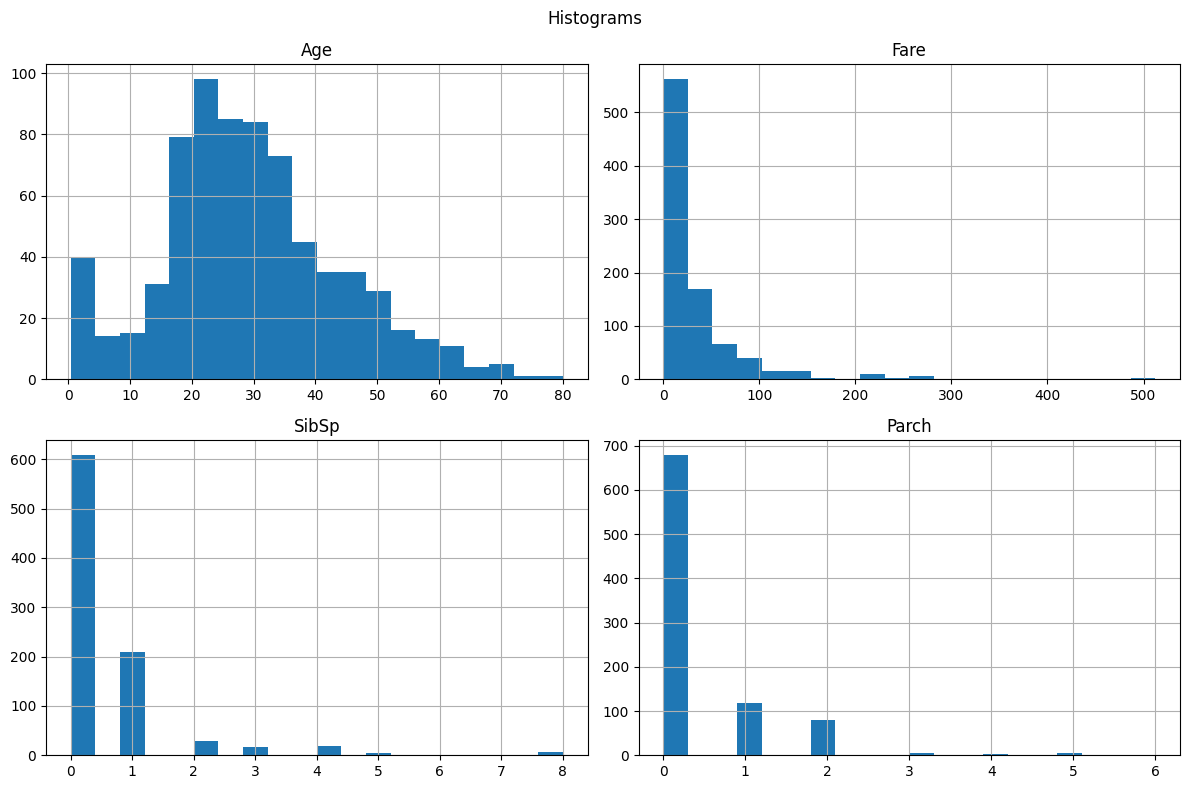

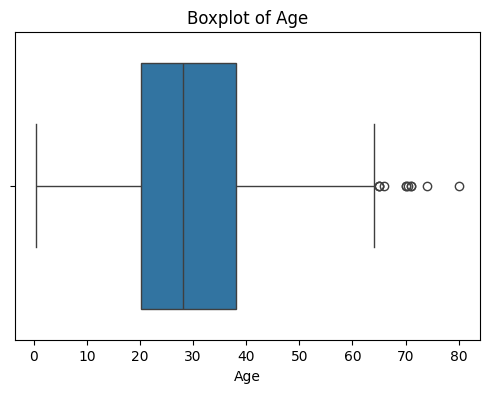

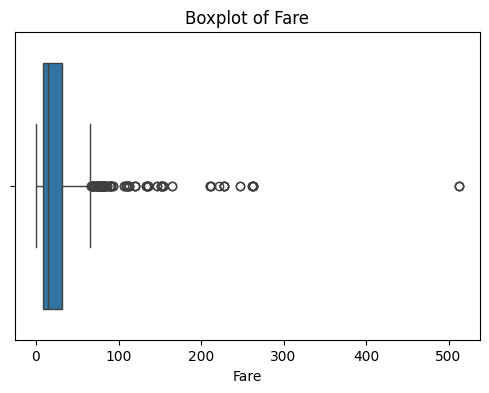

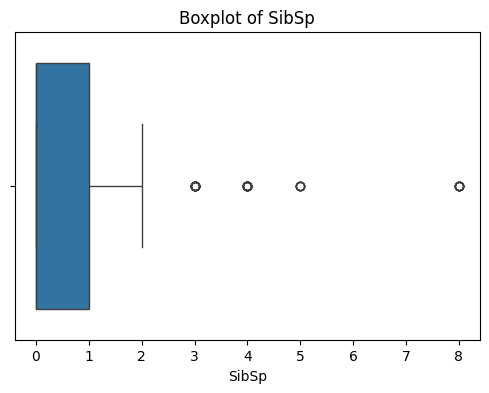

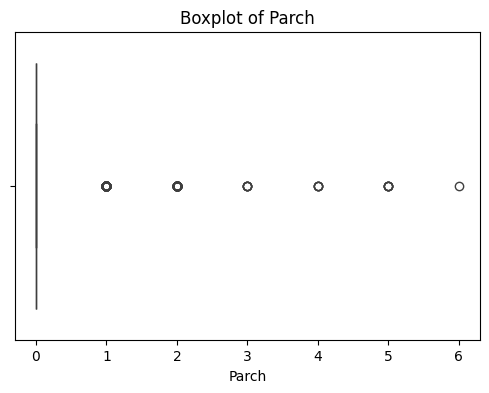

In [5]:
import seaborn as sns

numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Histograms
df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms')
plt.tight_layout()
plt.show()

# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

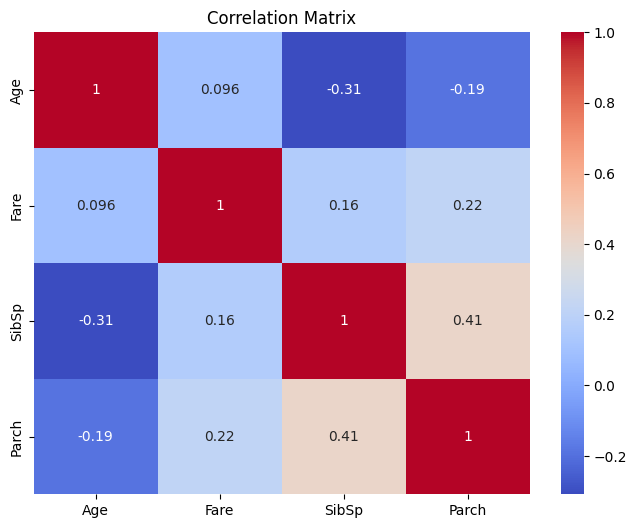

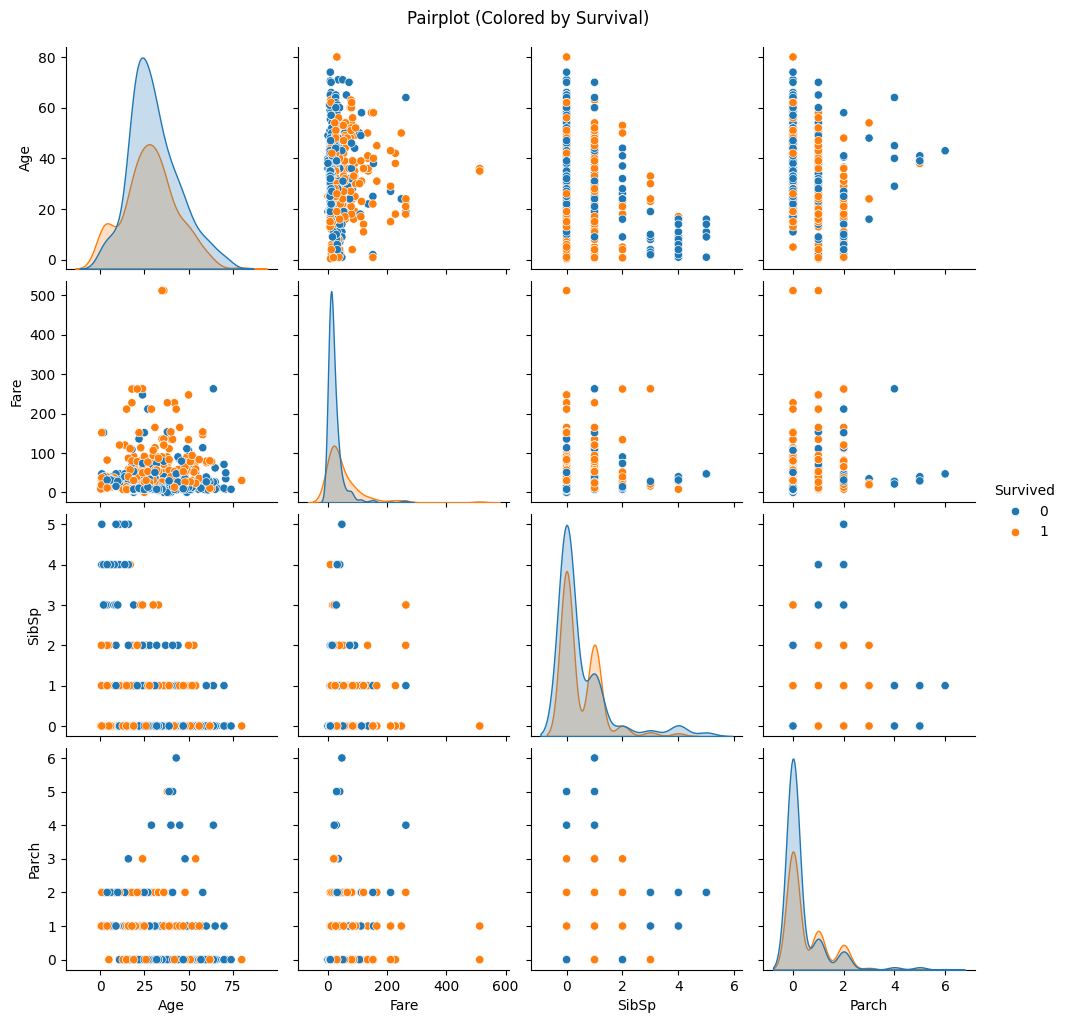

In [6]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot (add hue='Survived' for insight)
sns.pairplot(df[numeric_cols + ['Survived']].dropna(), hue='Survived')
plt.suptitle('Pairplot (Colored by Survival)', y=1.02)
plt.show()

In [7]:
# Survival rate by sex
print(df.groupby('Sex')['Survived'].mean())

# Survival rate by Pclass
print(df.groupby('Pclass')['Survived'].mean())

# Check missing values
print(df.isnull().sum())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


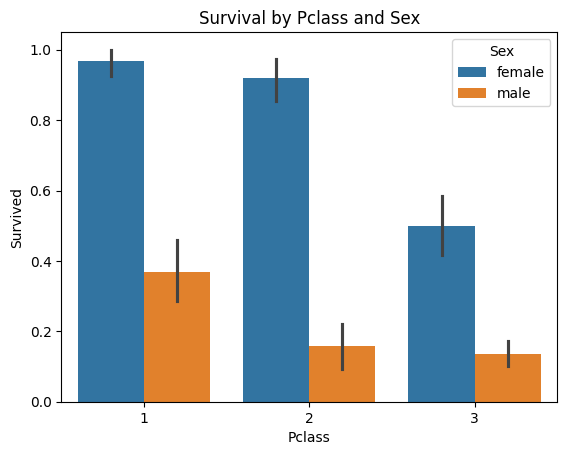

In [8]:
# Survival by Sex and Pclass
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title("Survival by Pclass and Sex")
plt.show()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


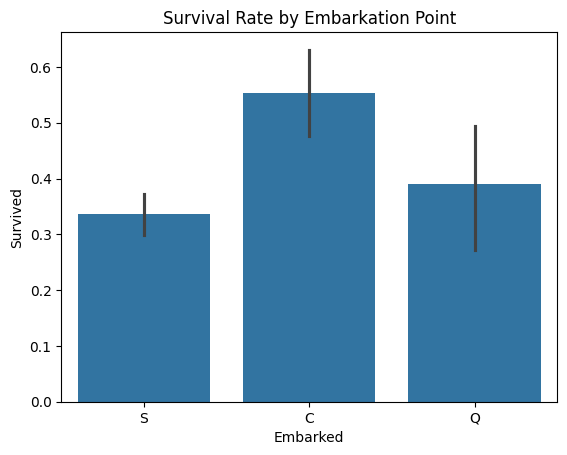

In [9]:
# Survival by Embarked
print(df.groupby('Embarked')['Survived'].mean())
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Embarkation Point")
plt.show()

In [10]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].nunique()} unique categories")

Name: 891 unique categories
Sex: 2 unique categories
Ticket: 681 unique categories
Cabin: 147 unique categories
Embarked: 3 unique categories


In [11]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0
